In [106]:
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re

from scipy import stats
from functools import reduce

# Import statements required for Plotly 
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

# Some matplotlib options
%matplotlib inline
matplotlib.style.use("ggplot")

In [107]:
import pandas  as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [108]:
pip install -U imbalanced-learn

Requirement already up-to-date: imbalanced-learn in c:\users\jackline\anaconda3\lib\site-packages (0.8.0)
Note: you may need to restart the kernel to use updated packages.


In [109]:
# General pandas options
pd.set_option('display.max_colwidth', -1)  # Show the entire column 
pd.options.display.max_columns = 100 
pd.options.display.max_rows = 10000 

# Seaborn options
sns.set_style("whitegrid")




In [110]:
# model to implement
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier


In [111]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold


In [112]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, roc_curve, precision_recall_curve


In [113]:
pip install -U imbalanced-learn

Requirement already up-to-date: imbalanced-learn in c:\users\jackline\anaconda3\lib\site-packages (0.8.0)Note: you may need to restart the kernel to use updated packages.



In [114]:
conda install nb_conda

Note: you may need to restart the kernel to use updated packages.
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Jackline\anaconda3

  added / updated specs:
    - nb_conda


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.1.1h             |       he774522_0         4.8 MB
    ------------------------------------------------------------
                                           Total:         4.8 MB

The following NEW packages will be INSTALLED:

  nb_conda           pkgs/main/win-64::nb_conda-2.2.1-py38_1
  nb_conda_kernels   pkgs/main/win-64::nb_conda_kernels-2.3.1-py38haa95532_0

The following packages will be SUPERSEDED by a higher-priority channel:

  conda              conda-forge::conda-4.9.2-py38haa244fe~ --> pkgs/main::conda-4.9.2-py38haa95532_0
  openssl                                       conda-forge --> pkgs/main






CondaHTTPError: HTTP 000 CONNECTION FAILED for url <https://repo.anaconda.com/pkgs/main/win-64/openssl-1.1.1h-he774522_0.conda>
Elapsed: -

An HTTP error occurred when trying to retrieve this URL.
HTTP errors are often intermittent, and a simple retry will get you on your way.





openssl-1.1.1h       | 4.8 MB    | ###2       |  33% 
openssl-1.1.1h       | 4.8 MB    | ###6       |  36% 
openssl-1.1.1h       | 4.8 MB    | ###7       |  38% 
openssl-1.1.1h       | 4.8 MB    | ###8       |  39% 
openssl-1.1.1h       | 4.8 MB    | ####1      |  42% 
openssl-1.1.1h       | 4.8 MB    | ####3      |  43% 
openssl-1.1.1h       | 4.8 MB    | ####3      |  44% 
openssl-1.1.1h       | 4.8 MB    | ####4      |  44% 
openssl-1.1.1h       | 4.8 MB    | ####5      |  45% 
openssl-1.1.1h       | 4.8 MB    | ####5      |  46% 
openssl-1.1.1h       | 4.8 MB    | ####6      |  46% 
openssl-1.1.1h       | 4.8 MB    | ####7      |  47% 
openssl-1.1.1h       | 4.8 MB    | ####7      |  48% 
openssl-1.1.1h       | 4.8 MB    | ####8      |  48% 
openssl-1.1.1h       | 4.8 MB    | ####8      |  49% 
openssl-1.1.1h       | 4.8 MB    | ####9      |  49% 
openssl-1.1.1h       | 4.8 MB    | ####9      |  50% 
openssl-1.1.1h       | 4.8 MB    | #####      |  50% 
openssl-1.1.1h       | 4.8 

In [115]:
pip install -U imbalanced-learn

Requirement already up-to-date: imbalanced-learn in c:\users\jackline\anaconda3\lib\site-packages (0.8.0)
Note: you may need to restart the kernel to use updated packages.


In [116]:

import warnings
warnings.filterwarnings('ignore')



In [117]:
df=pd.read_csv("C:/Users/Jackline/Desktop/Ass Data/2.csv")
(df.shape)

(1470, 35)

In [118]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [120]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [121]:
#seprating numerical columns from dataframe
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64','int8']

newdf = df.select_dtypes(include=numerics)

In [122]:
newdf.columns # numerical variable

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [123]:
df.Attrition = df.Attrition.astype("category")
df.Attrition = df.Attrition.cat.reorder_categories(['No','Yes'])
df.Attrition = df.Attrition.cat.codes

In [124]:
df.Attrition.dtype

dtype('int8')

In [125]:
df.BusinessTravel.value_counts() # I am considering them in order.

Travel_Rarely        1043
Travel_Frequently    277 
Non-Travel           150 
Name: BusinessTravel, dtype: int64

In [126]:
df.BusinessTravel = df.BusinessTravel.astype("category")
df.BusinessTravel = df.BusinessTravel.cat.reorder_categories(['Non-Travel','Travel_Rarely','Travel_Frequently'])
df.BusinessTravel = df.BusinessTravel.cat.codes

In [127]:
df.Department.value_counts() # This is nominal data here label encoding and just assigning nos. won't work so I create dummy variables.

Research & Development    961
Sales                     446
Human Resources           63 
Name: Department, dtype: int64

In [128]:
df.EducationField.value_counts()  # This is nominal data here label encoding and just assigning nos. won't work so I create dummy variables.

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other               82 
Human Resources     27 
Name: EducationField, dtype: int64

In [129]:

df.Gender.value_counts()  # This is nominal data here label encoding and just assigning nos. won't work so I create dummy variables.

Male      882
Female    588
Name: Gender, dtype: int64

In [130]:
df.JobRole.value_counts() # This is nominal data here label encoding and just assigning nos. won't work so I create dummy variables.

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative         83 
Research Director            80 
Human Resources              52 
Name: JobRole, dtype: int64

In [131]:
df.MaritalStatus.value_counts() # This is nominal data here label encoding and just assigning nos. won't work so I create dummy variables.

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

In [132]:
df.Over18.value_counts() # constant so delete

Y    1470
Name: Over18, dtype: int64

In [133]:
df.OverTime.value_counts()

No     1054
Yes    416 
Name: OverTime, dtype: int64

In [134]:
df.OverTime = df.OverTime.astype("category")
df.OverTime = df.OverTime.cat.reorder_categories(['No','Yes'])
df.OverTime = df.OverTime.cat.codes

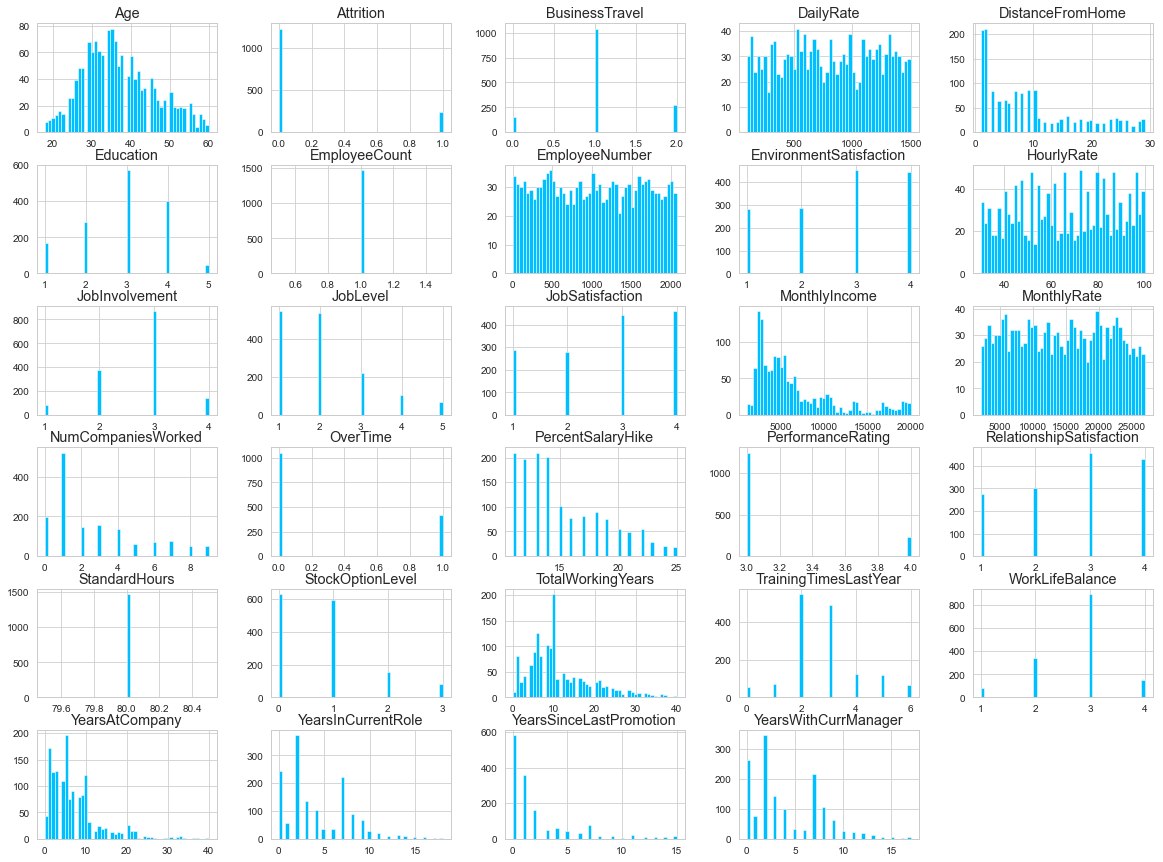

In [135]:
# Plot for all variables distribution + Count
# Graph distribution
df.hist (bins=50, figsize=(20,15), color = 'deepskyblue')
plt.show()

In [136]:
#seprating numerical columns from dataframe
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64','int8']

newdf = df.select_dtypes(include=numerics)

In [137]:
newdf.columns # numerical variable

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'DistanceFromHome',
       'Education', 'EmployeeCount', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

<AxesSubplot:xlabel='YearsWithCurrManager'>

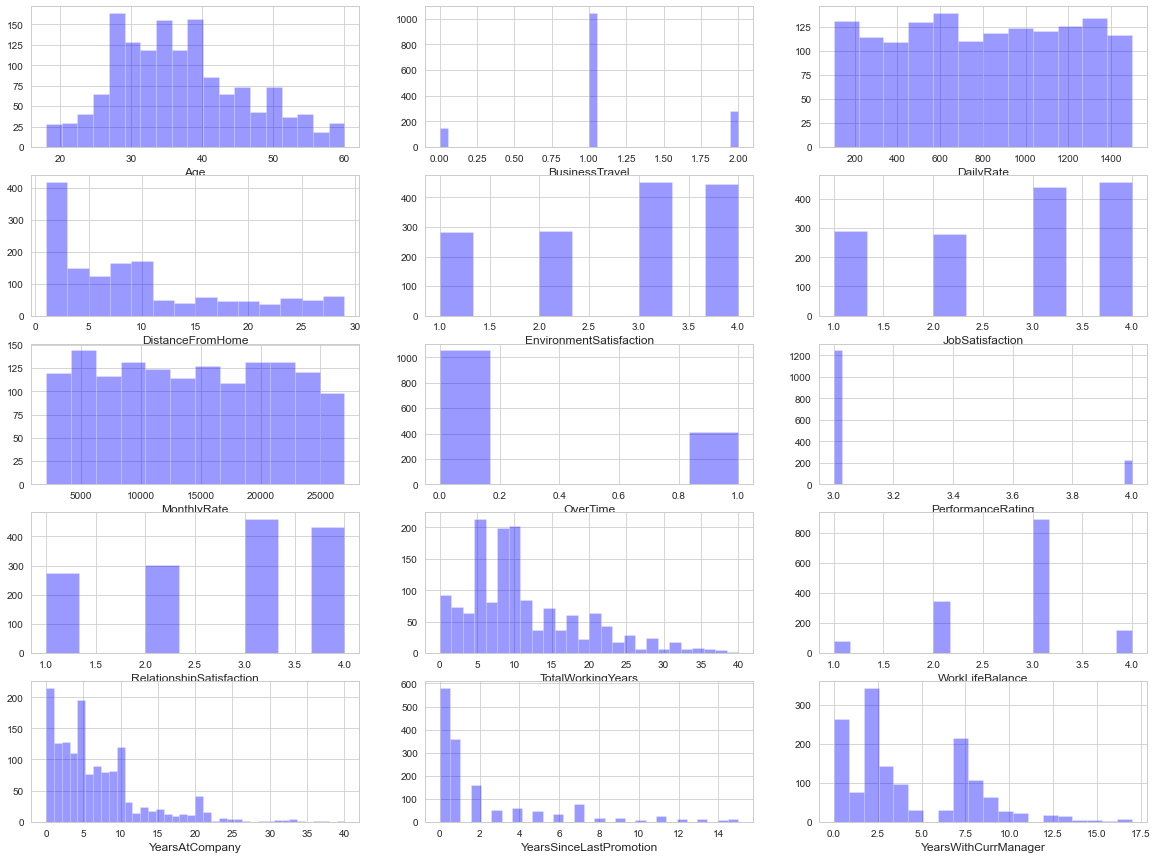

In [138]:
# Create a figure space matrix consisting of 3 columns and 2 rows
fig, ax = plt.subplots(figsize=(20,15), ncols=3, nrows=5)
# The amount of space above titles
"""y_title_margin = .2
ax[0][0].set_title("Age",y = y_title_margin)
ax[0][1].set_title("BusinessTravel",y = y_title_margin)
ax[0][2].set_title("DailyRate",y = y_title_margin)
ax[1][0].set_title("DistanceFromHome",y = y_title_margin)
ax[1][1].set_title("EnvironmentSatisfaction",y = y_title_margin)
ax[1][2].set_title("JobSatisfaction",y = y_title_margin)
ax[2][0].set_title("MonthlyRate",y = y_title_margin)
ax[2][1].set_title("OverTime",y = y_title_margin)
ax[2][2].set_title("PerformanceRating",y = y_title_margin)
ax[3][0].set_title("RelationshipSatisfaction",y = y_title_margin)
ax[3][1].set_title("TotalWorkingYears",y = y_title_margin)
ax[3][2].set_title("WorkLifeBalance",y = y_title_margin)
ax[4][0].set_title("YearsAtCompany",y = y_title_margin)
ax[4][1].set_title("YearsSinceLastPromotion",y = y_title_margin)
ax[4][2].set_title("YearsWithCurrManage",y = y_title_margin)"""

sns.distplot(df.Age,kde=False,color="b", ax=ax[0][0])
sns.distplot(df.BusinessTravel,kde=False,color="b", ax=ax[0][1])
sns.distplot(df.DailyRate,kde=False,color="b", ax=ax[0][2])
sns.distplot(df.DistanceFromHome,kde=False,color="b", ax=ax[1][0])
sns.distplot(df.EnvironmentSatisfaction,kde=False,color="b", ax=ax[1][1])
sns.distplot(df.JobSatisfaction,kde=False,color="b", ax=ax[1][2])
sns.distplot(df.MonthlyRate,kde=False,color="b", ax=ax[2][0])
sns.distplot(df.OverTime,kde=False,color="b", ax=ax[2][1])
sns.distplot(df.PerformanceRating,kde=False,color="b", ax=ax[2][2])
sns.distplot(df.RelationshipSatisfaction,kde=False,color="b", ax=ax[3][0])
sns.distplot(df.TotalWorkingYears,kde=False,color="b", ax=ax[3][1])
sns.distplot(df.WorkLifeBalance,kde=False,color="b", ax=ax[3][2])
sns.distplot(df.YearsAtCompany,kde=False,color="b", ax=ax[4][0])
sns.distplot(df.YearsSinceLastPromotion,kde=False,color="b", ax=ax[4][1])
sns.distplot(df.YearsWithCurrManager,kde=False,color="b", ax=ax[4][2])

In [139]:
#separting categorical columns

In [140]:
cat = ['object']

newdf1 = df.select_dtypes(include=cat)
newdf1.columns

Index(['Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus',
       'Over18'],
      dtype='object')

<AxesSubplot:xlabel='Over18', ylabel='count'>

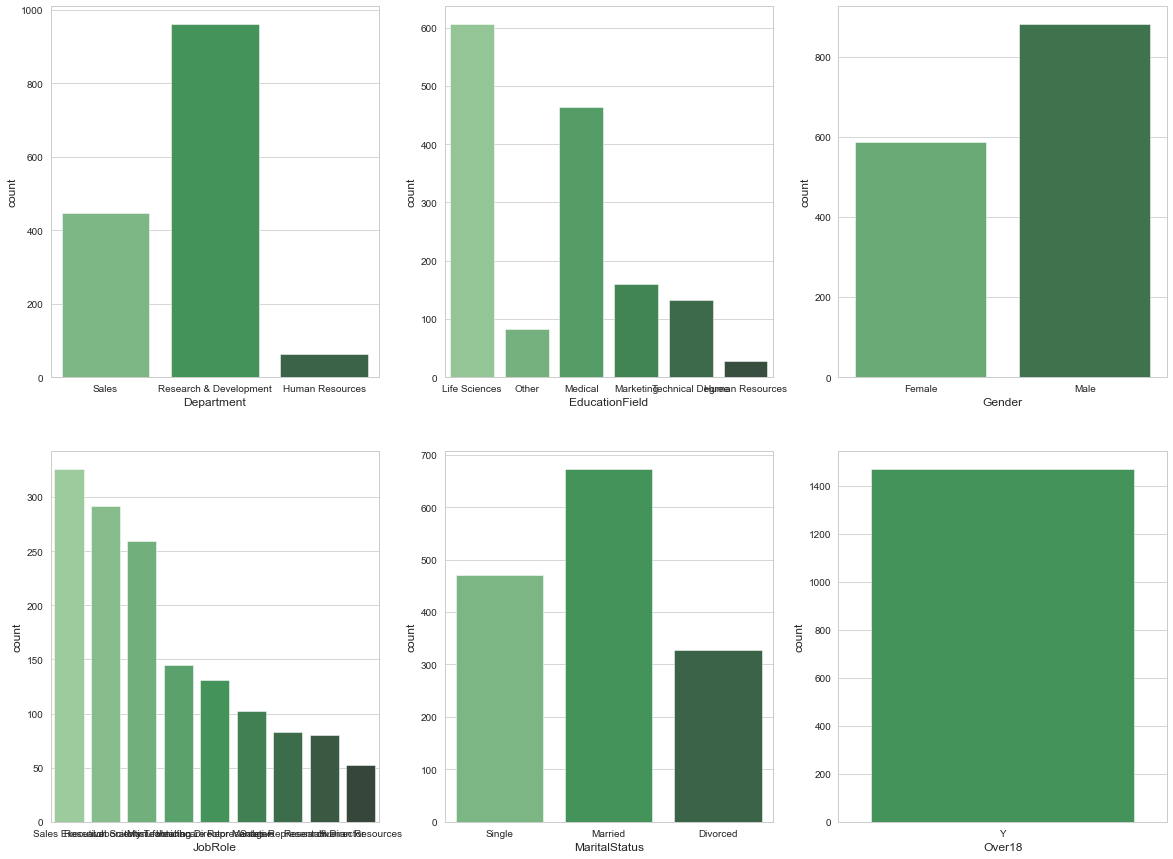

In [141]:
# Create a figure space matrix consisting of 3 columns and 2 rows
fig, ax = plt.subplots(figsize=(20,15), ncols=3, nrows=2)
sns.countplot(x="Department",data=df,palette="Greens_d",ax= ax[0][0])
sns.countplot(x="EducationField",data=df,palette="Greens_d",ax= ax[0][1])
sns.countplot(x="Gender",data=df,palette="Greens_d",ax= ax[0][2])
sns.countplot(x="JobRole",data=df,palette="Greens_d",ax= ax[1][0])
sns.countplot(x="MaritalStatus",data=df,palette="Greens_d",ax= ax[1][1])
sns.countplot(x="Over18",data=df,palette="Greens_d",ax= ax[1][2]) # drop Over18

In [142]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

<AxesSubplot:xlabel='BusinessTravel', ylabel='Age'>

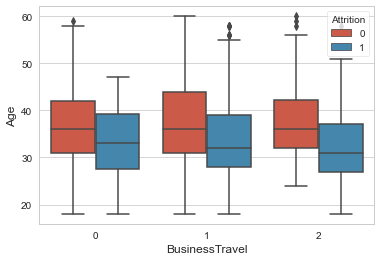

In [143]:
# Create a figure space matrix consisting of 3 columns and 2 rows ## box plot for categorical vs numerical
sns.boxplot(x="BusinessTravel",y="Age",hue="Attrition",data=df) 
# we can conclude that most employers who are in range of 27-38 leave company.this can be due to career switch or want salary hike.

<AxesSubplot:xlabel='Department', ylabel='count'>

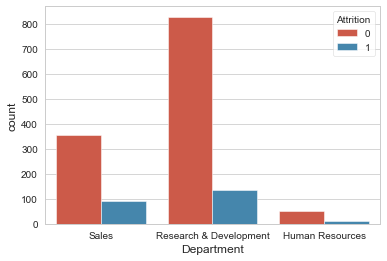

In [144]:
sns.countplot(x="Department",data=df,hue='Attrition')  # no specific relation

<AxesSubplot:xlabel='Attrition', ylabel='DistanceFromHome'>

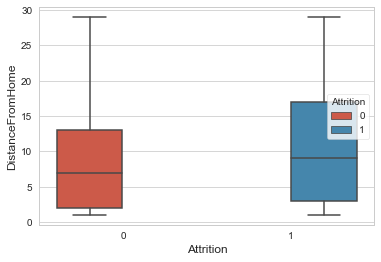

In [145]:
sns.boxplot(x="Attrition",y='DistanceFromHome',hue="Attrition",data=df) # no specific relation

<AxesSubplot:xlabel='Education', ylabel='count'>

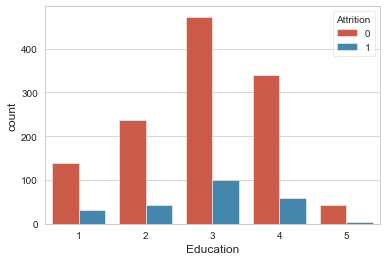

In [146]:
sns.countplot(x="Education",data=df,hue='Attrition') # no specific relation

<AxesSubplot:xlabel='EducationField', ylabel='count'>

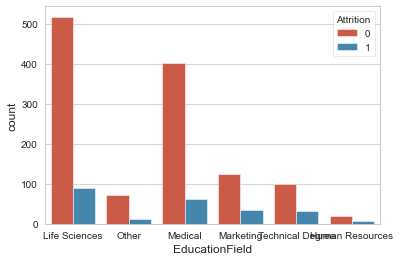

In [147]:
sns.countplot(x="EducationField",data=df,hue='Attrition') # no specific relation

<AxesSubplot:xlabel='EnvironmentSatisfaction', ylabel='count'>

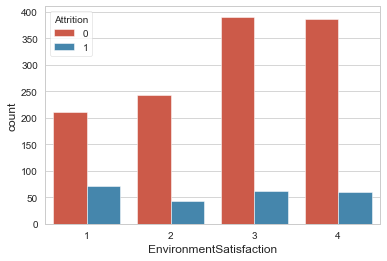

In [148]:
sns.countplot(x="EnvironmentSatisfaction",data=df,hue='Attrition') # we can see that % of attrition for environment satisfaction = 1,2 will be more that of 3 and 4.

<AxesSubplot:xlabel='Attrition', ylabel='YearsSinceLastPromotion'>

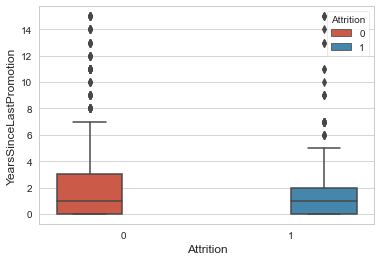

In [149]:

sns.boxplot(x="Attrition",y="YearsSinceLastPromotion",hue="Attrition",data=df)